In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append("model/")
from diffusion import GaussianDiffusion, DiffusionImageAPI
import torch
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt

[80x120]


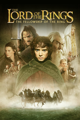

In [2]:
from PIL import Image
import requests

url = "https://www.themoviedb.org/t/p/w1280/6oom5QYQ2yQTMJIbnvbkBL9cHo6.jpg"
image = Image.open(requests.get(url, stream=True).raw)
w, h = image.size
image = image.resize((w // 16, h // 16))
#image = image.resize((16, 16))
w, h = image.size
print(f"[{w}x{h}]")
image

In [3]:
def display_tensor(tensor):
  image = Image.fromarray(((tensor.permute(1, 2, 0).cpu().numpy() +  1) / 2 * 255).astype(np.uint8))
  return image

In [4]:
image_tensor = torch.tensor(np.array(image)).permute(2, 0, 1).float() / 255.0 * 2.0 - 1.0
display_tensor(image_tensor).save("visualization/original.png")

In [5]:
noisy_images = [image_tensor]
extra_noisy = image_tensor.clone()
for i in range(1001):
  extra_noisy += torch.randn_like(image_tensor) * 0.02
  noisy_images.append(extra_noisy.clone())
  if i % 200 == 0:
    display_tensor(extra_noisy).save(f"visualization/step_{i}.png")
noisy = noisy_images[1]
noisy_images = [display_tensor(image) for image in noisy_images]

In [12]:
noisy_images[0].save("visualization/animation.gif", save_all=True, append_images=noisy_images[1::10], duration=100, loop=0)

In [6]:
noise = noisy - image_tensor
display_tensor(noisy).save("visualization/noisy.png")

In [7]:
display_tensor(noise).save("visualization/noise.png")

In [8]:
prediction = torch.randn_like(image_tensor) * 0.2
display_tensor(prediction).save("visualization/prediction.png")

In [9]:
remove_predicted = noisy - prediction
display_tensor(remove_predicted).save("visualization/remove_predicted.png")